# Laboratorio 1

### Librerías

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tkinter import Tk
from tkinter.filedialog import askopenfilename

## Problema 1

#### Definición

In [17]:
def definir_color(imagen, color):
    '''
        Color: Código de color para filtrar:
            1: Azul
            2: Verde
            3: Rojo
            10: Rojo y Verde
            20: Verde y Azul
            30: Azul y Rojo
    '''

    # Copia para no modificar la original
    img_modificada = np.zeros_like(imagen)

    # Activar canales según el código de color
    if color == 1:
        img_modificada[:,:,0] = imagen[:,:,0]  # Azul
    elif color == 2:
        img_modificada[:,:,1] = imagen[:,:,1]  # Verde
    elif color == 3:
        img_modificada[:,:,2] = imagen[:,:,2]  # Rojo
    elif color == 10:
        img_modificada[:,:,1] = imagen[:,:,1]  # Verde
        img_modificada[:,:,2] = imagen[:,:,2]  # Rojo
    elif color == 20:
        img_modificada[:,:,0] = imagen[:,:,0]  # Azul
        img_modificada[:,:,1] = imagen[:,:,1]  # Verde
    elif color == 30:
        img_modificada[:,:,0] = imagen[:,:,0]  # Azul
        img_modificada[:,:,2] = imagen[:,:,2]  # Rojo

    # Convertir la imagen de vuelta a RGB
    img_modificada = cv2.cvtColor(img_modificada, cv2.COLOR_BGR2RGB)

    return img_modificada

In [7]:
def mostrar_imagenes_colores(imagen_color, imagen_modificada):
    '''
    Muestra dos imágenes la original y modificada.
    '''
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Imagen original
    axes[0].imshow(imagen_color)
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    # Imagen modificada
    axes[1].imshow(imagen_modificada)
    axes[1].set_title('Imagen Modificada')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

#### Uso y muestras de imágenes

##### Instrucciones

- **Selecciona la imagen:** Al ejecutar la celda de código, se abrirá una ventana emergente. Haz clic en "Seleccionar una imagen" y elige la imagen que deseas procesar desde tu equipo. Puedes seleccionar archivos en formatos como JPG, JPEG, PNG, BMP, o GIF.

- **Ingresa el código de color:** Se te pedirá que ingreses un código de color. Escribe uno de los siguientes números y presiona Enter:

* 1: Mostrar solo el canal azul.
* 2: Mostrar solo el canal verde.
* 3: Mostrar solo el canal rojo.
* 10: Mostrar los canales rojo y verde.
* 20: Mostrar los canales verde y azul.
* 30: Mostrar los canales azul y rojo.

- **Visualiza las imágenes:** Se mostrarán dos imágenes lado a lado: la imagen original y la imagen modificada con los canales de color seleccionados.

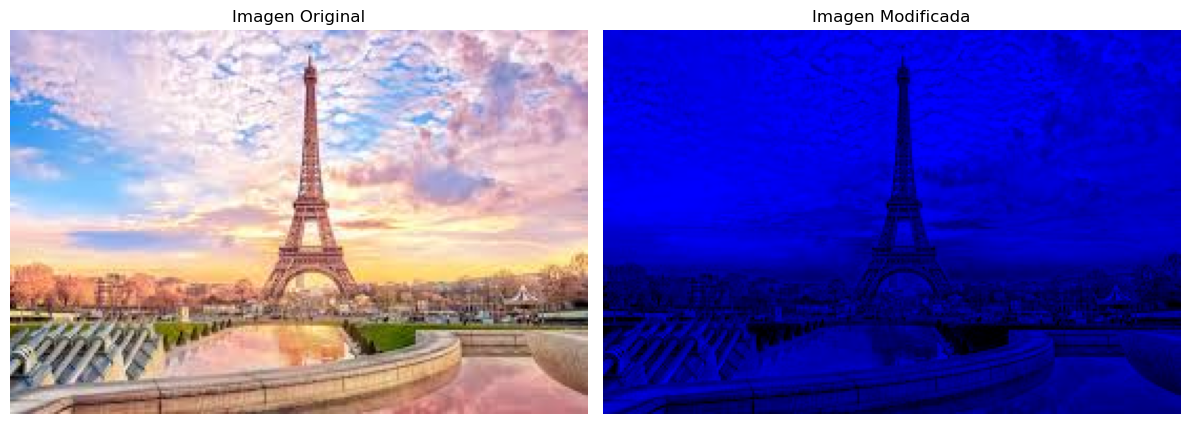

In [18]:
# Seleccionar la imagen
Tk().withdraw() 
ruta_imagen = askopenfilename(title="Seleccione una imagen", filetypes=[("Archivos de imagen", "*.jpg *.jpeg *.png *.bmp *.gif")])

# Verificar si se seleccionó una imagen
if not ruta_imagen:
    print("No se seleccionó ninguna imagen.")
    exit()

while True:
    try:
        color = int(input("Ingrese el código de color (1: Azul, 2: Verde, 3: Rojo, 10: Rojo y Verde, 20: Verde y Azul, 30: Azul y Rojo): "))
        if color in [1, 2, 3, 10, 20, 30]:
            break
        else:
            print("Código de color inválido. Intente de nuevo.")
    except ValueError:
        print("Entrada inválida. Por favor, ingrese un número.")

# Cargar y procesar la imagen
imagen = cv2.imread(ruta_imagen)
resultado = definir_color(imagen, color)

# Mostrar imágenes
mostrar_imagenes_colores(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB), resultado) 


## Problema 2

#### Definición

In [32]:
def construir_imagen(imagen_rojo, imagen_verde, imagen_azul):
    '''
    Construye una imagen a color a partir de tres imágenes en escala de grises que representan los canales rojo, verde y azul.
    '''

    # Convertir imágenes a escala de grises
    img_rojo = cv2.imread(imagen_rojo, cv2.IMREAD_GRAYSCALE)
    img_verde = cv2.imread(imagen_verde, cv2.IMREAD_GRAYSCALE)
    img_azul = cv2.imread(imagen_azul, cv2.IMREAD_GRAYSCALE)
    
    # Verificar que las imágenes tengan las mismas dimensiones
    if img_rojo.shape != img_verde.shape != img_azul.shape:
        raise ValueError("Las imágenes deben tener las mismas dimensiones")
    
    # Crear imagen vacía con 3 valores (BGR)
    img_color = np.zeros((img_rojo.shape[0], img_rojo.shape[1], 3), dtype=np.uint8)
    
    # Asignar el color correspondiente
    img_color[:,:,2] = img_rojo
    img_color[:,:,1] = img_verde
    img_color[:,:,0] = img_azul
    
    return img_color

#### Uso

##### Imagen 1

In [33]:
ruta_img1_rojo = 'imagen1/imagen1_salida_gray_rojo.jpg'
ruta_img1_verde = 'imagen1/imagen1_salida_gray_verde.jpg'
ruta_img1_azul = 'imagen1/imagen1_salida_gray_azul.jpg'

# Contruir imagen
img1_color = construir_imagen(ruta_img1_rojo, ruta_img1_verde, ruta_img1_azul)

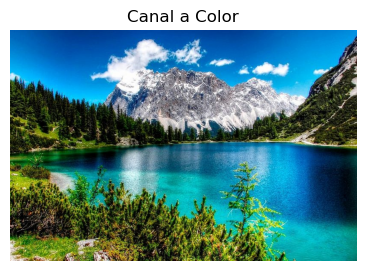

In [34]:
# Mostrar imagen
plt.figure(figsize=(8,3))
plt.title('Canal a Color')
plt.imshow(cv2.cvtColor(img1_color, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

##### Imagen 2

In [35]:
ruta_img2_rojo = 'imagen2/imagen2_salida_gray_rojo.jpg'
ruta_img2_verde = 'imagen2/imagen2_salida_gray_verde.jpg'
ruta_img2_azul = 'imagen2/imagen2_salida_gray_azul.jpg'

# Contruir imagen
img2_color = construir_imagen(ruta_img2_rojo, ruta_img2_verde, ruta_img2_azul)

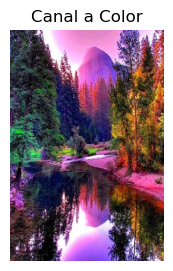

In [36]:
# Mostrar imagen
plt.figure(figsize=(8,3))
plt.title('Canal a Color')
plt.imshow(cv2.cvtColor(img2_color, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

##### Perro

In [37]:
ruta_perro_rojo = 'perro/perro_salida_gray_rojo.jpg'
ruta_perro_verde = 'perro/perro_salida_gray_verde.jpg'
ruta_perro_azul = 'perro/perro_salida_gray_azul.jpg'

# Contruir imagen
perro_color = construir_imagen(ruta_perro_rojo, ruta_perro_verde, ruta_perro_azul)

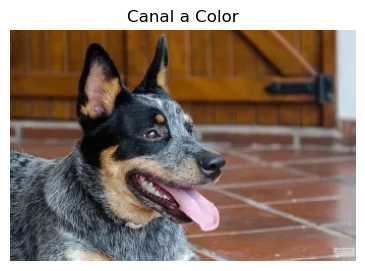

In [38]:
# Mostrar imagen
plt.figure(figsize=(8,3))
plt.title('Canal a Color')
plt.imshow(cv2.cvtColor(perro_color, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()

## Problema 3

#### Definición

In [39]:
def crear_imagen_gris(imagen_color):
    # Leer imagen
    img_color = cv2.imread(imagen_color)
    
    # Separar los caneles
    azul, verde, rojo = cv2.split(img_color)
    
    # Crear imagen a escala de grises
    img_rojo = np.zeros_like(img_color)
    img_verde = np.zeros_like(img_color)
    img_azul = np.zeros_like(img_color)
    
    img_rojo[:,:,2] = rojo
    img_verde[:,:,1] = verde
    img_azul[:,:,0] = azul

    # Crear directorio sino existe
    if not os.path.exists('Problema_3'):
        os.makedirs('Problema_3')
    
    # Guardar las imágenes
    cv2.imwrite('Problema_3/imagen_rojo.jpg', img_rojo)
    cv2.imwrite('Problema_3/imagen_verde.jpg', img_verde)
    cv2.imwrite('Problema_3/imagen_azul.jpg', img_azul)
    
    # Mostrar imágenes
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,3,1)
    plt.title('Canal Rojo')
    plt.imshow(cv2.cvtColor(img_rojo, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1,3,2)
    plt.title('Canal Verde')
    plt.imshow(cv2.cvtColor(img_verde, cv2.COLOR_BGR2RGB))
    
    plt.subplot(1,3,3)
    plt.title('Canal Azul')
    plt.imshow(cv2.cvtColor(img_azul, cv2.COLOR_BGR2RGB))
    
    plt.show()

#### Uso

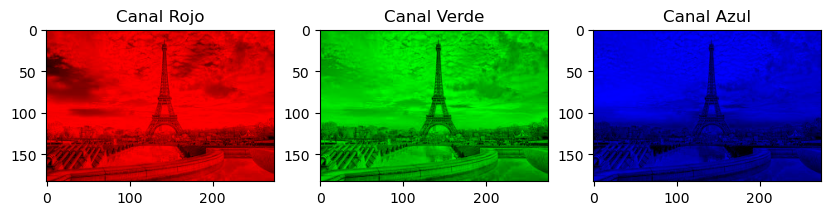

In [40]:
ruta_imagen = 'paris.jpg'
crear_imagen_gris(ruta_imagen)

### Problema 4

#### Definición

In [41]:
def calcular_histogramas(imagen):
    histograma, _ = np.histogram(imagen.flatten(), bins=256, range=[0,256])
    return histograma

In [42]:
def mostrar_histograma(imagen_color):
    img_color = cv2.imread(imagen_color)
    img_color_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
    canal_azul, canal_verde, canal_rojo = cv2.split(img_color_rgb)
    
    hist_azul = calcular_histogramas(canal_azul)
    hist_verde = calcular_histogramas(canal_verde)
    hist_rojo = calcular_histogramas(canal_rojo)
    
    img_gris = (canal_rojo + canal_verde + canal_azul) / 3
    hist_gris = calcular_histogramas(img_gris)
    
    media_azul = np.mean(canal_azul)
    media_verde = np.mean(canal_verde)
    media_rojo = np.mean(canal_rojo)
    media_gris = np.mean(img_gris)
    
    plt.figure(figsize=(12,8))
    
    plt.subplot(2,2,1)
    plt.title('Histograma Canal Azul')
    plt.bar(np.arange(256), hist_azul, color='blue', alpha=0.6)
    plt.axvline(x=media_azul, color='red', linestyle='--', label=f'Media Azul: {media_azul:.2f}')
    plt.legend()
    
    plt.subplot(2,2,2)
    plt.title('Histograma Canal Verde')
    plt.bar(np.arange(256), hist_verde, color='green', alpha=0.6)
    plt.axvline(x=media_verde, color='red', linestyle='--', label=f'Media Verde: {media_verde:.2f}')
    plt.legend()
    
    plt.subplot(2,2,3)
    plt.title('Histograma Canal Rojo')
    plt.bar(np.arange(256), hist_rojo, color='red', alpha=0.6)
    plt.axvline(x=media_rojo, color='red', linestyle='--', label=f'Media Rojo: {media_rojo:.2f}')
    plt.legend()

    plt.subplot(2,2,4)
    plt.title('Histograma Escala de Grises')
    plt.bar(np.arange(256), hist_gris, color='gray', alpha=0.6)
    plt.axvline(x=media_gris, color='red', linestyle='--', label=f'Media Gris: {media_gris:.2f}')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

#### Uso

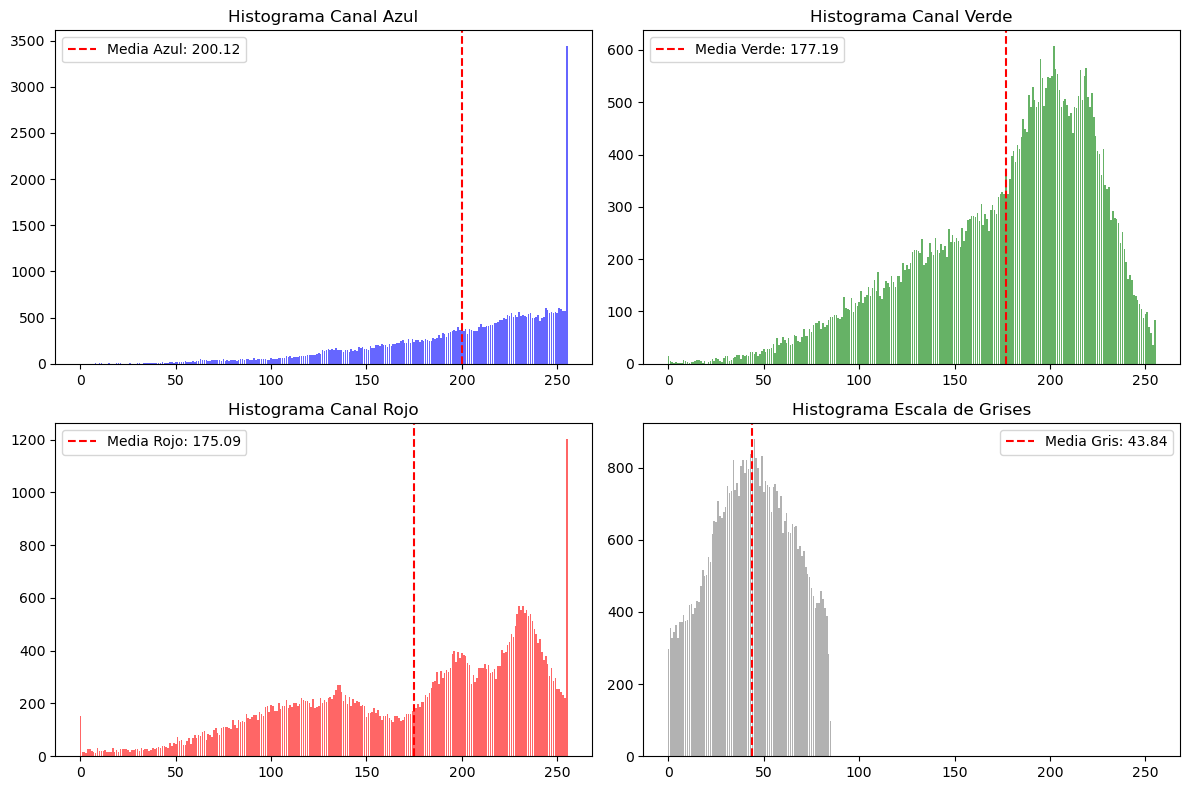

In [43]:
# Ruta 
ruta_img_color = 'paris.jpg'

# Mostrar los histogramas
mostrar_histograma(ruta_img_color)

### Problema 4

#### Escala de Grises Ponderada

El enfoque de escala de grises ponderado es una técnica para convertir una imagen a escala de grises utilizando un promedio ponderado de los valores de los canales de color. A diferencia del promedio simple, que toma la media aritmética de los canales, el enfoque ponderado asigna diferentes pesos a los canales de color, basándose en la sensibilidad del ojo humano a cada uno de estos canales.

El ojo humano es más sensible a las variaciones en la luminancia del verde que en el rojo y azul. Por eso, los métodos ponderados suelen utilizar los siguientes pesos aproximados:

* Rojo (R): 0.299
* Verde (G): 0.587
* Azul (B): 0.114

Esta ponderación se basa en la fórmula de luminancia estándar de la ITU-R BT.601, que se utiliza comúnmente en televisión y video.

#### Definición

In [44]:
def escala_gris_ponderada(imagen):
    # Verificar formato
    if imagen.ndim != 3 or imagen.shape[2] != 3:
        raise ValueError('La imagen debe estar en formato RGB (3 canales).')
    
    # Pesos
    pesos = np.array([0.299, 0.587, 0.114])
    
    # Calcular la imagen
    gris_ponderado = np.dot(imagen, pesos).astype(np.uint8)
    
    return gris_ponderado

In [45]:
def mostrar_imagenes(imagen_color, imagen_grises):
    # Crear figura y ejes
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    
    # Imagen original
    axes[0].imshow(imagen_color)
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')
    
    # Imagen modificada
    axes[1].imshow(imagen_grises, cmap='gray')
    axes[1].set_title('Escala de Grises Ponderada')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()

#### Uso

In [46]:
# Leer imagen
ruta_imagen = 'paris.jpg'
imagen = cv2.imread(ruta_imagen)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

In [47]:
# Convertir a escala de grises ponderada
img_gris_ponderada = escala_gris_ponderada(imagen_rgb)

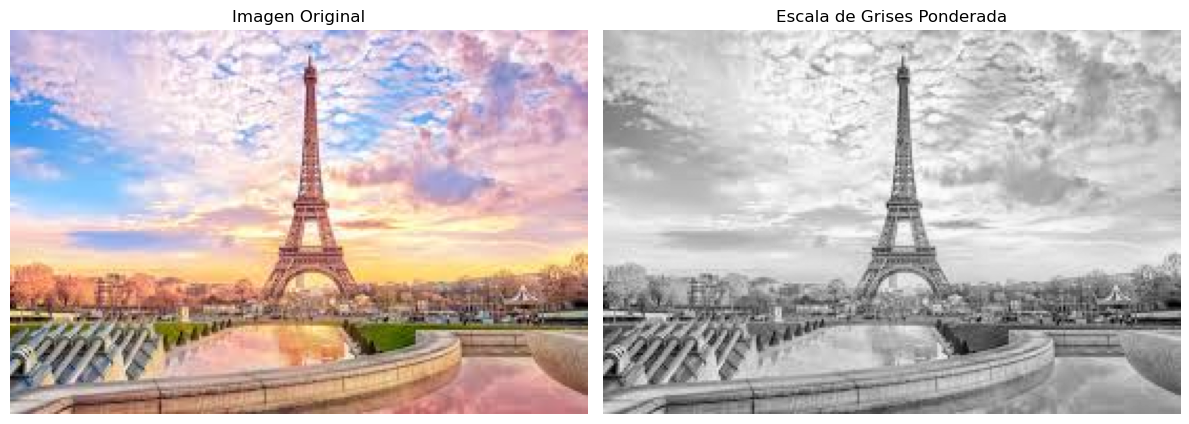

In [48]:
# Mostrar imágenes
mostrar_imagenes(imagen_rgb, img_gris_ponderada)

## Problema 6

### Espacio de Color HSV

El espacio de color HSV (Hue, Saturation, Value) es un modelo de color que describe los colores de una manera más intuitiva para los humanos en comparación con el espacio de color RGB (Rojo, Verde, Azul). HSV es particularmente útil para aplicaciones que requieren una manipulación y ajuste más fácil de los colores.

#### Componentes del Espacio de Color HSV

1. **Matiz (Hue)**: Representa el color en sí mismo y se mide en grados de 0 a 360. Cada valor de matiz corresponde a un color específico en el espectro de colores:
   - 0° o 360°: Rojo
   - 60°: Amarillo
   - 120°: Verde
   - 180°: Cian
   - 240°: Azul
   - 300°: Magenta

2. **Saturación (Saturation)**: Indica la intensidad o pureza del color. Se mide en porcentaje, de 0% a 100%:
   - 0%: El color es completamente gris (sin saturación).
   - 100%: El color es completamente puro.

3. **Valor (Value)**: Representa la luminosidad del color, desde 0 (negro) hasta 100% (brillo máximo del color). Es la intensidad o brillo del color.

#### Visualización del espacio HSV

El espacio HSV se puede visualizar como un cono o cilindro:

<div align="center">
    <img src="cono.png" alt="Cono HSV">
</div>

- El **hue** se representa en el ángulo alrededor del eje central.
- La **saturación** se representa en la distancia radial desde el eje central.
- El **value** se representa en la altura a lo largo del eje central.

#### Conversión de RGB a HSV

La conversión de RGB a HSV se realiza utilizando las siguientes fórmulas:

1. **Normalización**: Primero, se normalizan los valores RGB a un rango de 0 a 1.

$$ R' = \frac{R}{255} $$
$$ G' = \frac{G}{255} $$
$$ B' = \frac{B}{255} $$

2. **Cálculo del Valor (V)**:

$$ V = \max(R', G', B') $$

3. **Cálculo de la Saturación (S)**:

$$ S = \frac{V - \min(R', G', B')}{V} $$

Si $$ V = 0 $$, entonces $$ S = 0 $$

4. **Cálculo del Matiz (H)**:

 $$ \Delta = V - \min(R', G', B') $$

$$ H = \begin{cases} 
60 \times \left(\frac{G' - B'}{\Delta} \mod 6\right) & \text{si } V = R' \\
60 \times \left(\frac{B' - R'}{\Delta} + 2\right) & \text{si } V = G' \\
60 \times \left(\frac{R' - G'}{\Delta} + 4\right) & \text{si } V = B' 
\end{cases} $$

Si  $$ H < 0 $$, entonces $$ H = H + 360 $$

#### Mapeo de Colores

Para mapear un color al espacio HSV, se sigue este procedimiento:

1. **Obtener los valores RGB**: Captura los valores de los canales R, G, B de un color.
2. **Normalizar los valores**: Convierte los valores RGB al rango [0, 1].
3. **Aplicar las fórmulas de conversión**: Usa las fórmulas anteriores para calcular H, S y V.
4. **Convertir a grados y porcentaje**: La salida de H se encuentra en grados (0 a 360), y S y V en porcentaje (0% a 100%).

#### Ejemplo

In [49]:
import colorsys

def rgb_a_hsv(r, g, b):
    """Convierte valores RGB (0-255) a HSV (0-1)."""
    r, g, b = r/255.0, g/255.0, b/255.0  # Normalizar a 0-1
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    return h * 360, s * 100, v * 100  # Convertir a grados y porcentaje

In [50]:
rojo_hsv = rgb_a_hsv(255, 0, 0)  
print(rojo_hsv) 

(0.0, 100.0, 100.0)


#### Ventajas

- **Intuitivo:** El HSV es más intuitivo para los humanos, ya que separa el color (hue) de su brillo (value) y saturación.
- **Manipulación de color:** Es más fácil ajustar el color, brillo y saturación por separado en HSV que en RGB.
- **Segmentación por color:** La segmentación de imágenes basada en color es más sencilla en HSV, ya que se puede definir rangos de hue para seleccionar colores específicos.

#### Aplicaciones

El espacio de color HSV se utiliza en diversas aplicaciones, como:

- **Edición de imágenes:** Ajustes de color, corrección de color.
- **Visión por computadora:** Detección de objetos, seguimiento, reconocimiento de patrones.
- **Diseño gráfico:** Selección de paletas de colores.

## Referencias

- Wikipedia contributors. (2023, June 24). HSL and HSV. In Wikipedia, The Free Encyclopedia. Retrieved July 23, 2024, from https://en.wikipedia.org/wiki/HSL_and_HSV
- OpenCV documentation. (n.d.). Color conversions. Retrieved July 23, 2024, from https://docs.opencv.org/4.x/de/d25/imgproc_color_conversions.html